In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('~/Desktop/Polaris/Ecommerce_marketing_campaign.csv')

In [11]:
df['ID'].count()  #2240 rows

2240

In [12]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
# create a new column named “Age”, fillin the “Age” column by calculating age using birth year
df['Age'] = 2021 - df['Year_Birth'] 
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,40
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,0,0,0,0,0,0,3,11,0,54
6,965,1971,Graduation,Divorced,55635.0,0,1,11/13/2012,34,235,...,0,0,0,0,0,0,3,11,0,50
7,6177,1985,PhD,Married,33454.0,1,0,5/8/2013,32,76,...,0,0,0,0,0,0,3,11,0,36
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,0,0,0,0,0,0,3,11,1,47
9,5899,1950,PhD,Together,5648.0,1,1,3/13/2014,68,28,...,1,0,0,0,0,0,3,11,0,71


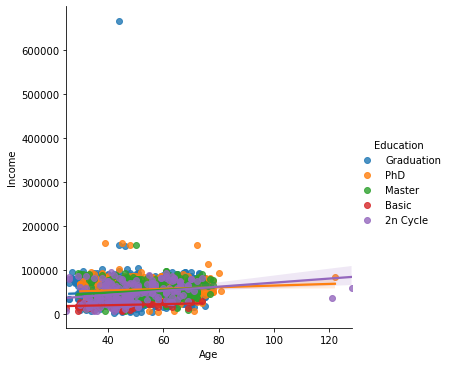

In [14]:
# Create a regression plot to show the relationship between “Age” and “Income”, for customers with different “Education”
sns.lmplot(x="Age", y="Income", hue="Education", col="Education", data=df)

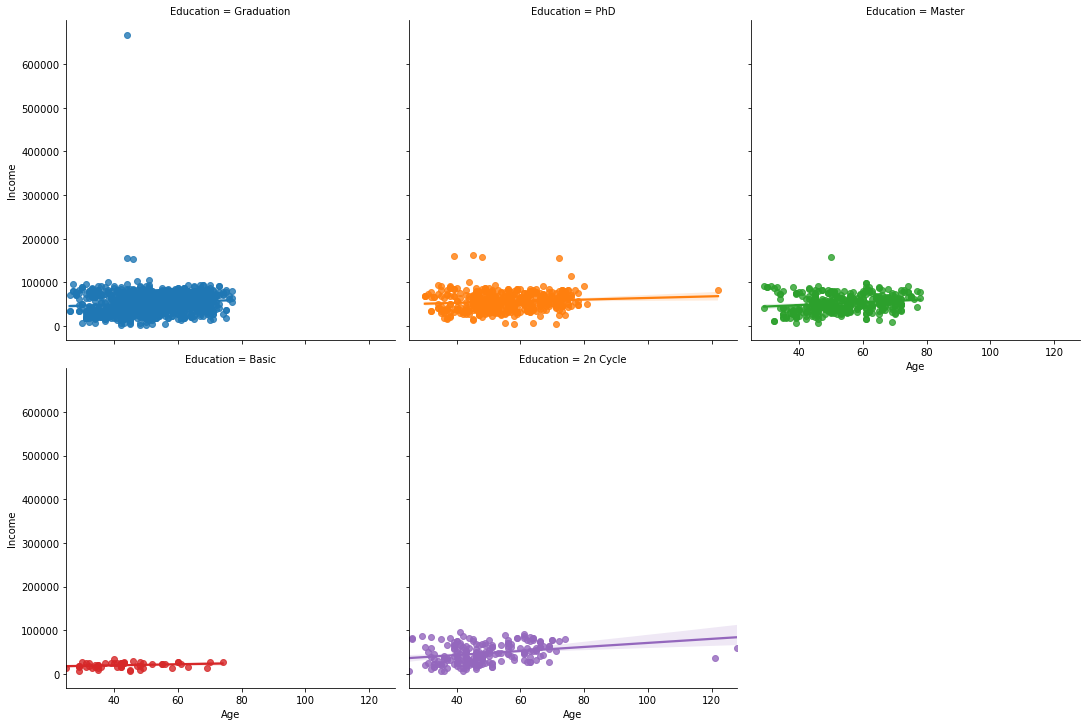

In [15]:
sns.lmplot(x="Age", y="Income", hue="Education", col="Education", col_wrap=3, data=df)

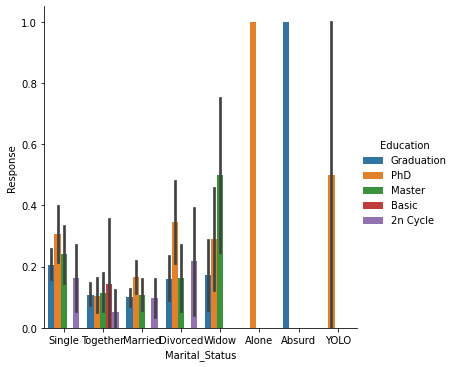

In [16]:
# Create a histogram that shows for people with different “Marital_Status” and break down by “Education”, 
# what is their response rate to marketing campaigns (“Response”)
sns.catplot(x="Marital_Status", y="Response", hue="Education", kind="bar", data=df)

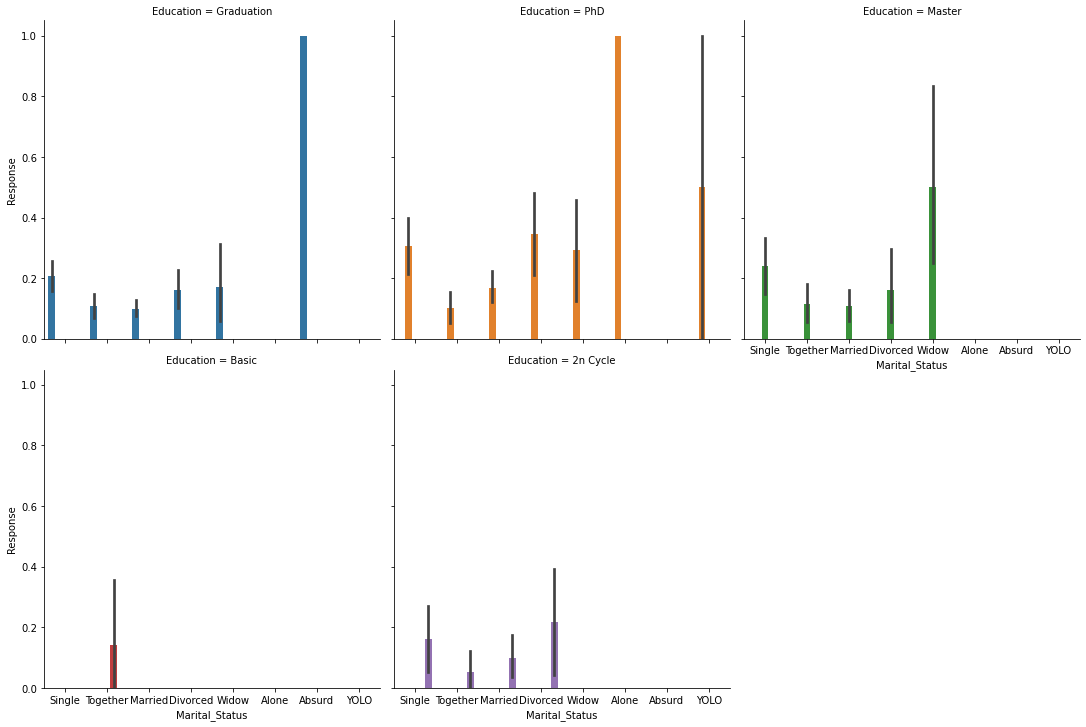

In [17]:
sns.catplot(x="Marital_Status", y="Response", hue="Education", col="Education", col_wrap=3, kind="bar", data=df)

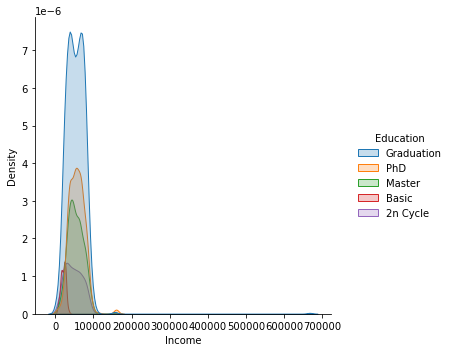

In [18]:
# Create a density plot to show the distribution “Income” for customers with different “Education” level
sns.displot(df, x="Income", hue="Education", kind="kde", fill=True)

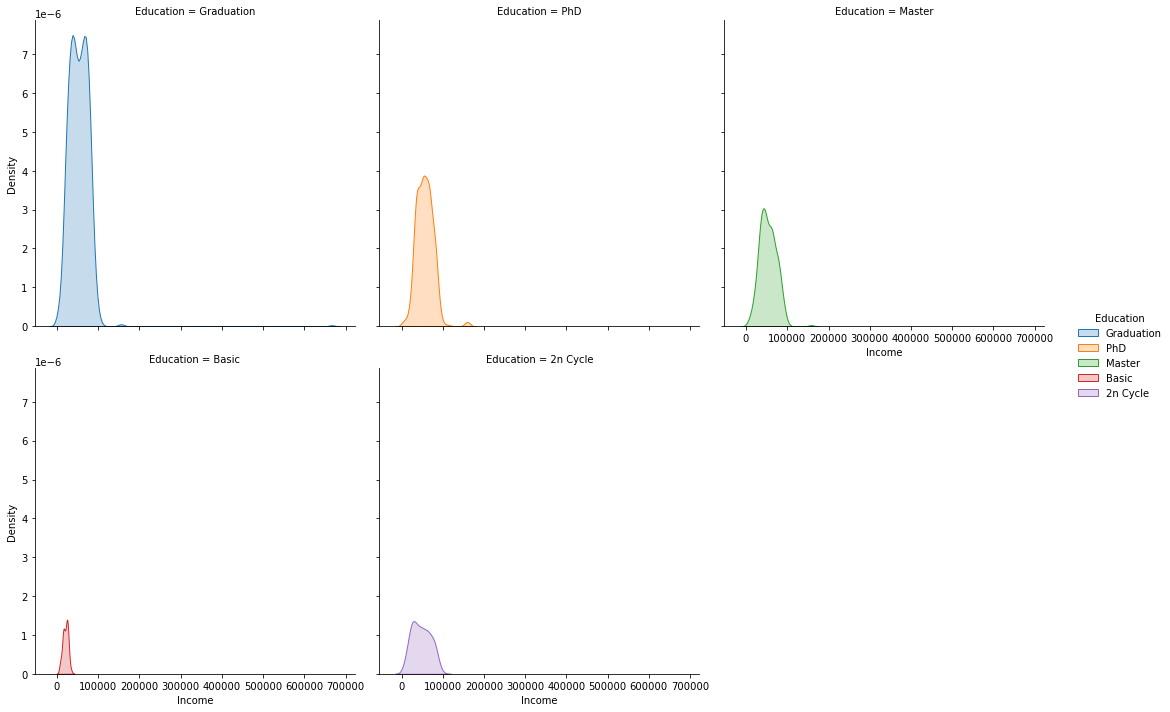

In [19]:
sns.displot(df, x="Income", hue="Education", col="Education", col_wrap=3, kind="kde", fill=True)

In [23]:
# Our goal is find out what kind of customers are more likely to response to our promotion 
# (what kind of customer might have “Reponse”==1) ?
# Explore through out the feature and try to find insights and visualize it.

df_0=df.groupby('Response')['ID','Year_Birth','Education','Marital_Status','Income','Age'].count()
df_0

<ipython-input-23-607b78ab2c2e>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_0=df.groupby('Response')['ID','Year_Birth','Education','Marital_Status','Income','Age'].count()


,ID,Year_Birth,Education,Marital_Status,Income,Age
Response,,,,,,
0,1906,1906,1906,1906,1883,1906
1,334,334,334,334,333,334


In [24]:
df_1=df.loc[0:2240,['ID','Year_Birth','Age', 'Education','Marital_Status','Income','Response']]
df_1

,ID,Year_Birth,Age,Education,Marital_Status,Income,Response
0,5524,1957,64,Graduation,Single,58138.0,1
1,2174,1954,67,Graduation,Single,46344.0,0
2,4141,1965,56,Graduation,Together,71613.0,0
3,6182,1984,37,Graduation,Together,26646.0,0
4,5324,1981,40,PhD,Married,58293.0,0
...,...,...,...,...,...,...,...
2235,10870,1967,54,Graduation,Married,61223.0,0
2236,4001,1946,75,PhD,Together,64014.0,0
2237,7270,1981,40,Graduation,Divorced,56981.0,0
2238,8235,1956,65,Master,Together,69245.0,0


In [25]:
df_1['Age'].max()

128

In [26]:
df_2=df_1[df_1['Response'] == 1]
df_2

,ID,Year_Birth,Age,Education,Marital_Status,Income,Response
0,5524,1957,64,Graduation,Single,58138.0,1
8,4855,1974,47,PhD,Together,30351.0,1
15,2114,1946,75,PhD,Single,82800.0,1
33,7373,1952,69,PhD,Divorced,46610.0,1
39,2968,1943,78,PhD,Divorced,48948.0,1
...,...,...,...,...,...,...,...
2194,7118,1957,64,Graduation,Married,73803.0,1
2198,2632,1954,67,Graduation,Married,50501.0,1
2202,11133,1973,48,PhD,YOLO,48432.0,1
2221,7366,1982,39,Master,Single,75777.0,1


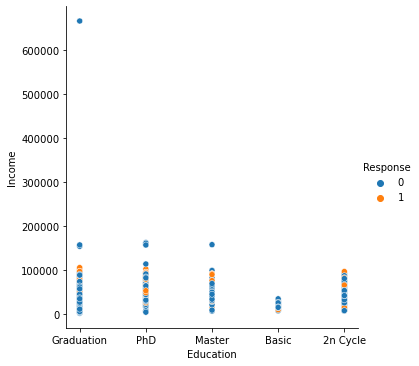

In [27]:
sns.relplot(x="Education",y="Income",hue="Response",data=df_1)

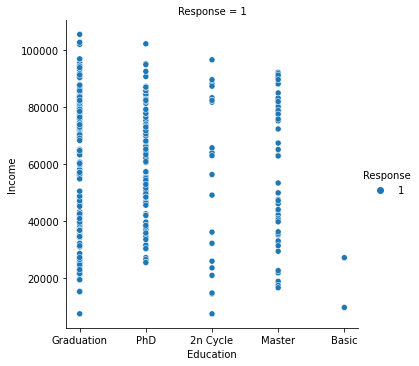

In [28]:
sns.relplot(x="Education",y="Income",hue="Response",col="Response",data=df_2)

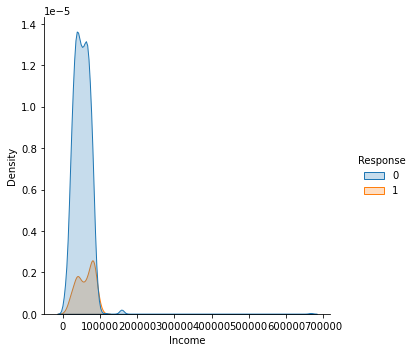

In [29]:
sns.displot(df_1, x="Income", hue="Response", kind="kde", fill=True)

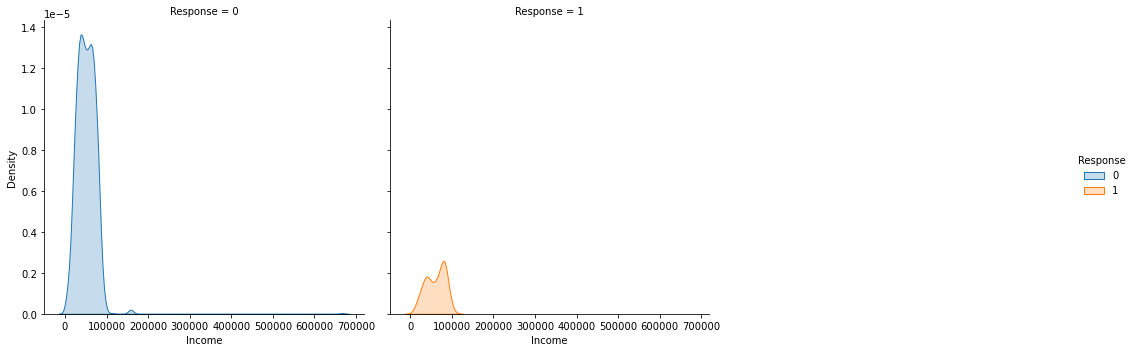

In [30]:
sns.displot(df_1, x="Income", hue="Response", col="Response", col_wrap=3, kind="kde", fill=True)

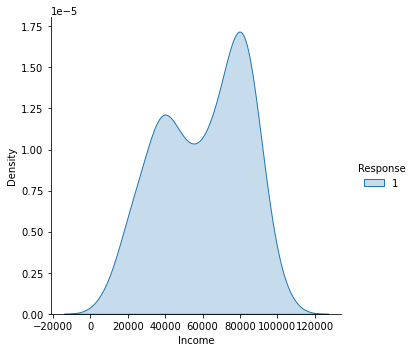

In [31]:
# vs for
sns.displot(df_2, x="Income", hue="Response", kind="kde", fill=True)

C:\Users\yeeyee\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


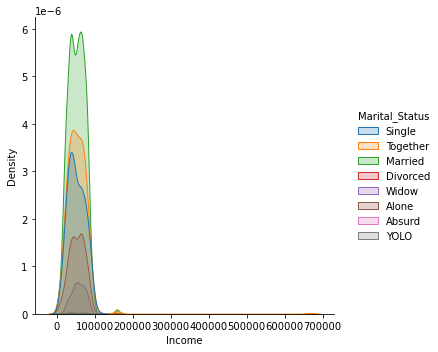

In [46]:
sns.displot(df, x="Income", hue="Marital_Status", kind="kde", fill=True)

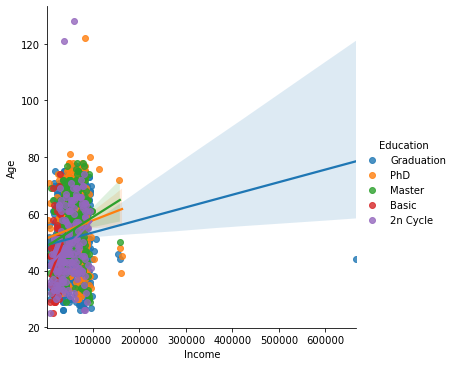

In [32]:
sns.lmplot(x="Income", y="Age", hue="Education", data=df_1)

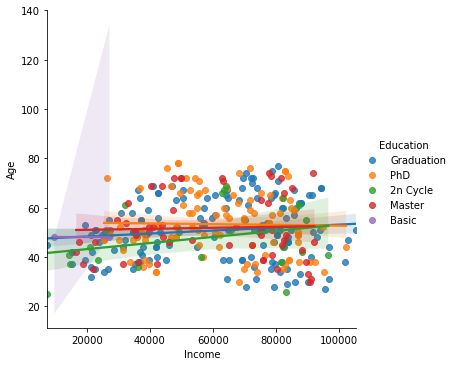

In [33]:
sns.lmplot(x="Income", y="Age", hue="Education", data=df_2)

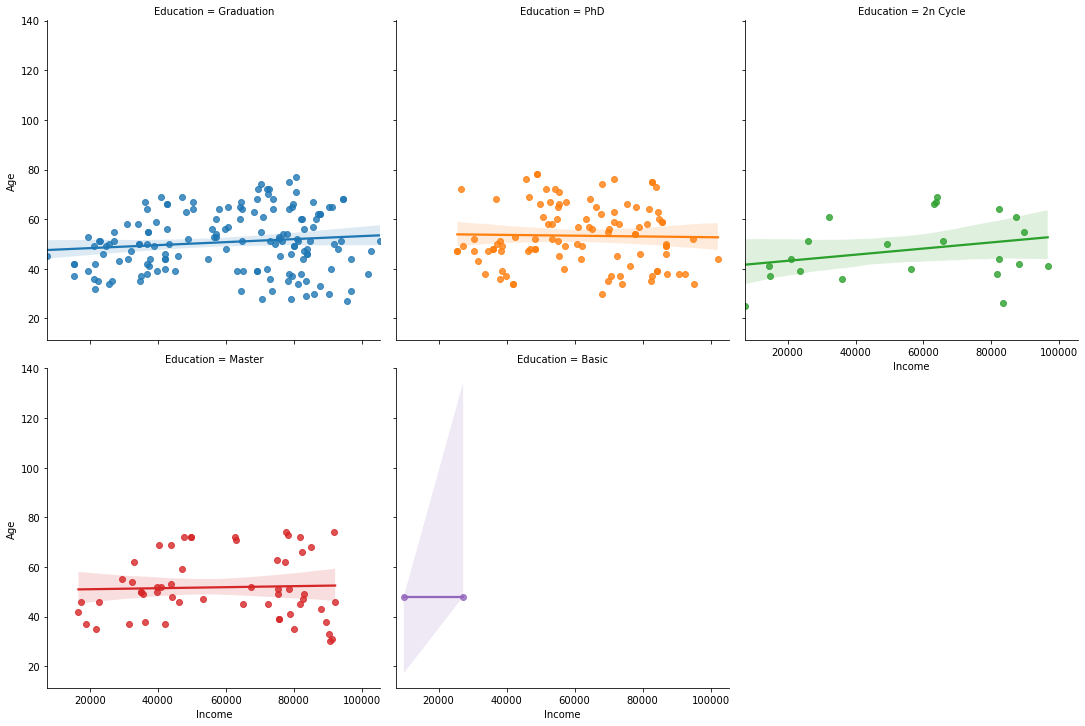

In [34]:
sns.lmplot(x="Income", y="Age", hue="Education", col="Education", col_wrap=3, data=df_2)

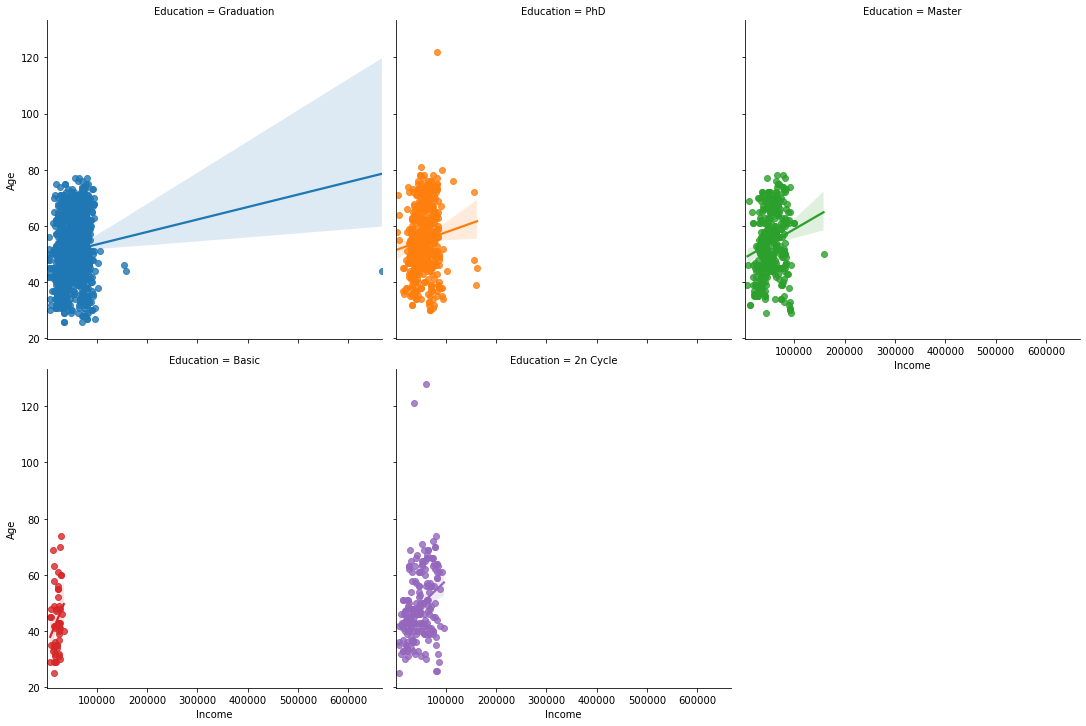

In [45]:
sns.lmplot(x="Income", y="Age", hue="Education", col="Education", col_wrap=3, data=df_1)

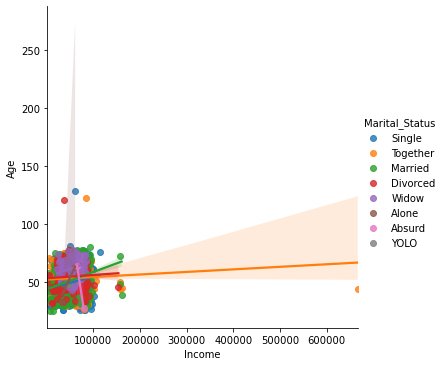

In [47]:
sns.lmplot(x="Income", y="Age", hue="Marital_Status", data=df_1)